# Data Modeling: Assumptions and remedy in case of violations


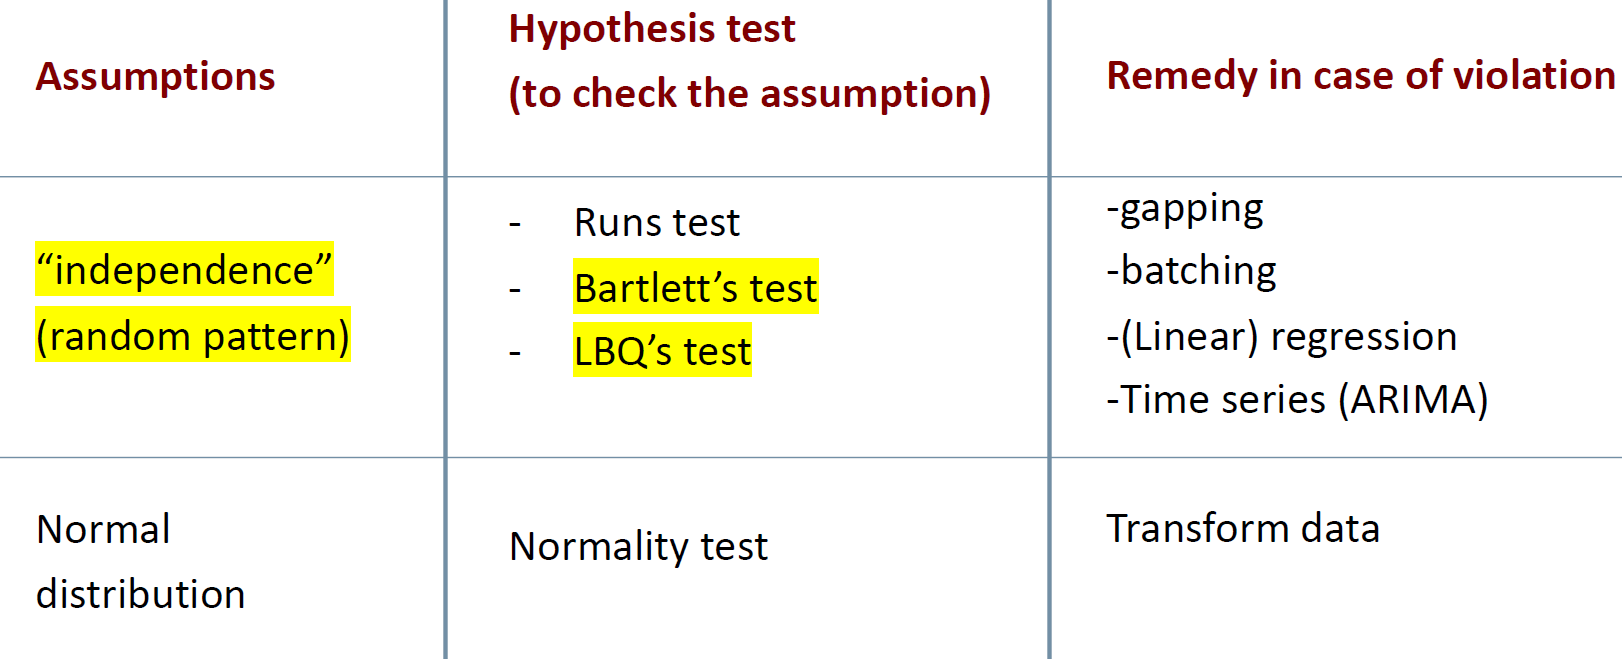


# Qualitative Independence Valuation: Runs Test

EXERCISE 1
The weekly sales (thousands of dollars) of an e-commerce company are listed in the csv file `ESE3_ex1.csv`.

1. Determine the value of 𝑛 and 𝑚 in observed runs
2. Assuming that the runs distribution is random, which is the expected number of runs?
3. Assuming that the underlying process is random, compute the 95% confidence interval for the number of runs, given 𝑚 and 𝑛 determined in point a)
4. Test the null hypothesis of observation randomness (significance level 5%)


## Point 1: Number of Runs
Determine the value of 𝑛 and 𝑚 in observed runs.

> ### Solution
> - 𝑛 is the total number of points 
> - 𝑚 is the number of points above the mean

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Import the dataset
data = pd.read_csv('ESE3_ex1.csv')

data.head()

,Ex1
0,61.6361
1,62.9236
2,66.7807
3,64.7094
4,64.6682


Number of points n = 30
Mean = 71.38


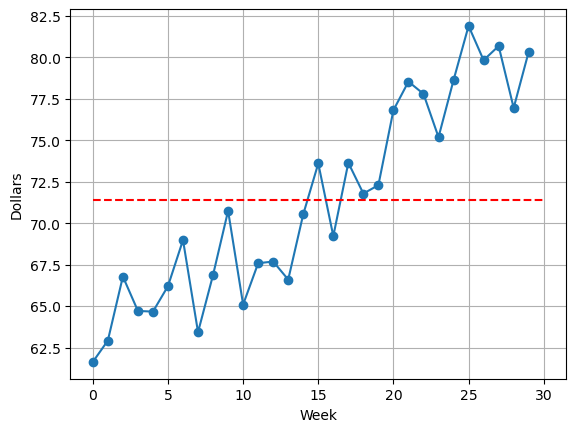

In [2]:
n=len(data)
print("Number of points n = %d" % n) #number of points

mean = data.mean()
print('Mean = %.2f'% mean) #mean of the points

# Let's plot the data first
plt.plot(data, 'o-')
plt.hlines(mean, 0, n, colors='r', linestyles='dashed')
plt.xlabel('Week')
plt.ylabel('Dollars')

plt.grid()
plt.show()


In [3]:
# Get the number of points above the mean
m = np.sum(data > mean).values[0]
print('Number of points above the mean, m = %d' % m) 

Number of points above the mean, m = 14


In [4]:
# Get the number of points above the mean using the count function
m = data[data > mean].count()
print('Number of points above the mean, m = %d' % m) 

Number of points above the mean, m = 14


> Now compute the number of runs. 

In [6]:
# Create a new series with the mean subtracted from the original series
new_series = np.array(data - mean).flatten() #flatten changes a column to a row array
print('new_series = ', new_series)
# Create a new series with the sign of the new series
new_series_sign = np.sign(new_series)
# This series will be 1 when the new series is positive and -1 when it is negative
print('new_series_sign = ', new_series_sign)

new_series =  [-9.74842667 -8.46092667 -4.60382667 -6.67512667 -6.71632667 -5.18052667
 -2.40492667 -7.95672667 -4.50442667 -0.64372667 -6.29282667 -3.80042667
 -3.69812667 -4.78642667 -0.85222667  2.21377333 -2.16592667  2.25297333
  0.39657333  0.90507333  5.42217333  7.14377333  6.40237333  3.79497333
  7.23447333 10.49967333  8.43507333  9.28837333  5.55877333  8.94287333]
new_series_sign =  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [7]:
# Count how many times the sign changes 
runs = (np.sum(np.diff(np.sign(new_series)) != 0) + 1)
print('Number of runs = %d' % runs) #number of runs

Number of runs = 4


## Point 2 Expected Number of Runs

Assuming that the runs distribution is random, which is the expected number of runs?

> ### Solution
> The expected number of runs, $Y$, is given by the formula:
>
> $$E(Y) =  \frac{2 m (n-m)}{n} +1 $$
>
> Where:
> - $n$ is the number of observations
> - $m$ is the number of observations above the mean


In [ ]:
#Expected number of runs
exp_runs= 2*m*(n-m)/n +1
print('Expected number of runs = %.3f' % exp_runs)

Expected number of runs = 15.933


## Point 3: Confidence Interal for the number of Runs
Assuming that the underlying process is random, compute the 95% confidence interval for the number of runs, given 𝑚 and 𝑛 determined in point 1. 

> ### Solution
> Standard deviation of $Y$:
> $$ \sqrt{V(Y)} = \sqrt\frac{2m(n-m)[2m(n-m)-n]}{ n^2 (n-1)} $$
> Normal approximation of a Poisson distribution:
> $$ Y \sim N(E(Y), V(Y)) $$
>
> Confidence interval: 
> $$E(Y) \pm z_{\alpha/2} \sqrt{V(Y)}$$


In [ ]:
# Standard deviation of the number of runs
std_runs = np.sqrt((2*m*(n-m)*(2*m*(n-m)-n)/((n**2)*(n-1))))
print('Standard deviation of runs = %.03f' % std_runs)

#95% confidence interval
conf_int= stats.norm.interval(0.95, loc=exp_runs, scale=std_runs)
print('Confidence interval: (%.3f, %.3f)' % (conf_int[0], conf_int[1]))

Standard deviation of runs = 2.679
Confidence interval: (10.683, 21.183)


## Point 4: Hypothesis Testing to find if process is random
Test the null hypothesis of observation randomness (significance level 5%)

> $H_0$: process is random
>
> $H_1$: process is NOT random
>
> Statistic: 
> $$ Z_{0} = \frac{Y-E(Y)}{\sqrt{V(Y)}}$$
>
> Rejection region:
> $ |Z_{0}| > z_{\alpha/2} $

In [ ]:
# Input data
alpha = 0.05 # significance level
#test statistic
z0 = (runs-exp_runs)/std_runs
z0 = z0.values[0]
print('z0 = %f' % z0)
z_alfa2= stats.norm.ppf(1-alpha/2)
print('z_alfa2 = %f' % z_alfa2)

if abs(z0)>z_alfa2:
  print('The null hypothesis is rejected: data is not randomly distributed.')
else: 
  print('The null hypothesis is accepted')

z0 = -4.455074
z_alfa2 = 1.959964
The null hypothesis is rejected: data is not randomly distributed.


> Compute the p-value: 
> $$ P-value = 2 \cdot [1-\Phi(|Z_0|)]$$

In [ ]:
# Remember, it is a two-tailed test, so we need to multiply the p-value by 2
p_value = 2 * (1 - stats.norm.cdf(abs(z0)))
print('p-value = %.3f' % p_value)

p-value = 0.000


> Alternatively, you can use the `runstest_1samp` function directly to compute the test statistic and the associated p-value. 

In [ ]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat, pval_runs = runstest_1samp(data['Ex1'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat))
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test statistic = -4.455
Runs test p-value = 0.000


Runs test is an euristic method, therefore it could be not in agreement with other tests

## Random data generation

> Let's generate a sequence of random data from the specified distributions.

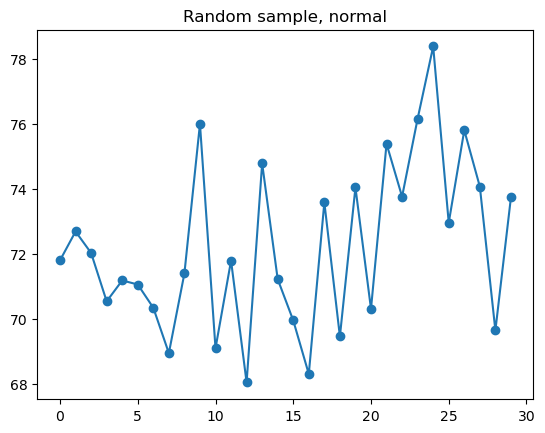

In [ ]:
# Generate random data
data_rand_norm = np.random.normal(loc=mean, scale=std_runs, size=n)
plt.plot(data_rand_norm, 'o-')
plt.title('Random sample, normal')
plt.show()

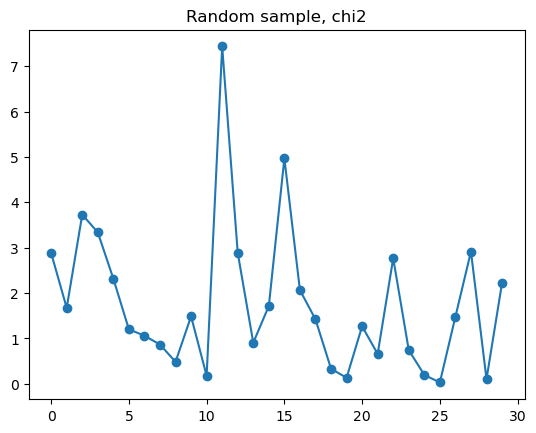

In [ ]:
data_rand_chi2 = np.random.chisquare(df=2, size=n)
plt.plot(data_rand_chi2, 'o-')
plt.title('Random sample, chi2')
plt.show()

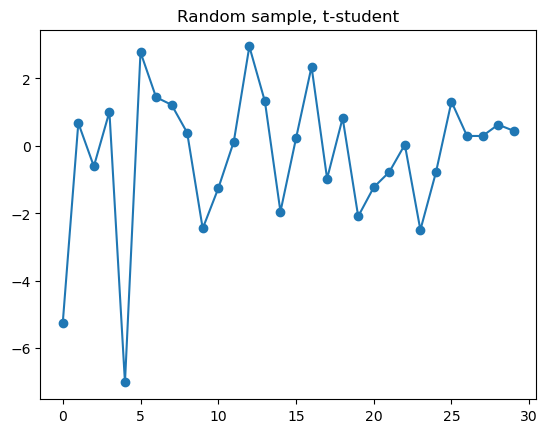

In [ ]:

data_rand_t= np.random.standard_t(df=2, size=n)
plt.plot(data_rand_t, 'o-')
plt.title('Random sample, t-student')
plt.show()


In [ ]:
_, pval = runstest_1samp(data_rand_norm, correction=False)
print('Runs test p-value = {:.3f}'.format(pval))

Runs test p-value = 0.512


# Violation of Normality Assumption. Prediction Interval on Indepedent NON-Normal Time Series (boxcox transformation)
A study was performed by ComputerTek Co to determine the time series of order processing durations. Data in the file `ESE3_ex2.csv` refer to the period 1995, July – 1997, October. Each datum represents the time (in days) to ship the order.

1. Design a 95% **prediction interval** for future observations.

Objective of the module: introduce the concept of prediction interval and show an example on how to draw predictions from data. Two options are available: random data (use distribution), if data is not random you need a time series model (systematic patterns).

Prediction interval is not a confidence interval: it's the interval in which we predict the next point in the series to be. (I expect the Temperature of tomorrow to be between 20 and 25° with a given confidence)

> ### Suggestion
> Remind that if: 
> $$X \sim N(\mu, \sigma^2) $$
> then:
> $$ \frac{X - \mu}{s} \sim t_{n-1}$$

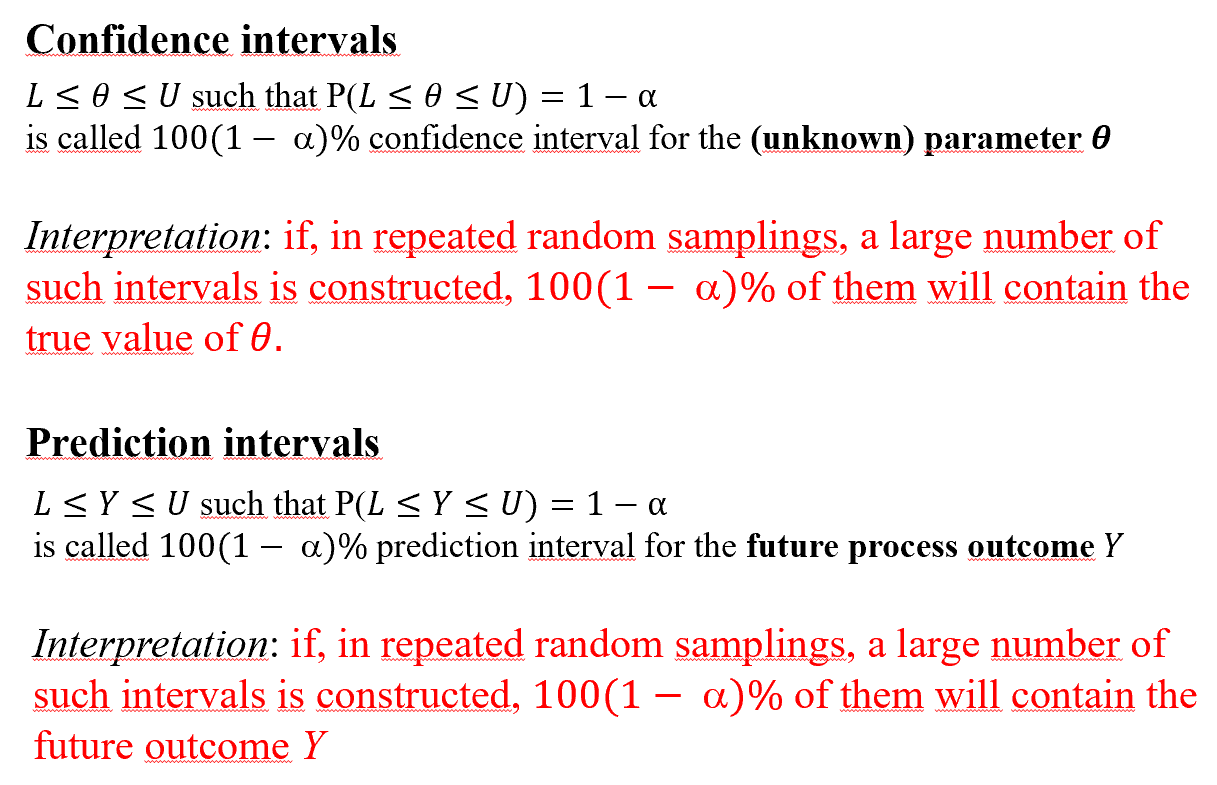

In [6]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE3_ex2.csv')

data.head()

,Ex2
0,29
1,21
2,17
3,9
4,49


> We need a model of process output to make predictions. 
> Which kind of model? **Time series** model or **distributional** model.
>
> We can verify if the process is random by using :
> 1. time series plot (qualitative)
> 2. ACF/PCAF (qualitative)
> 3. runs test (quantitative)
> 4. Bartlett’s test (quantitative)
> 5. LBQ test (quantitative)

We explore all these tests and compare their results

> 1. Time series plot

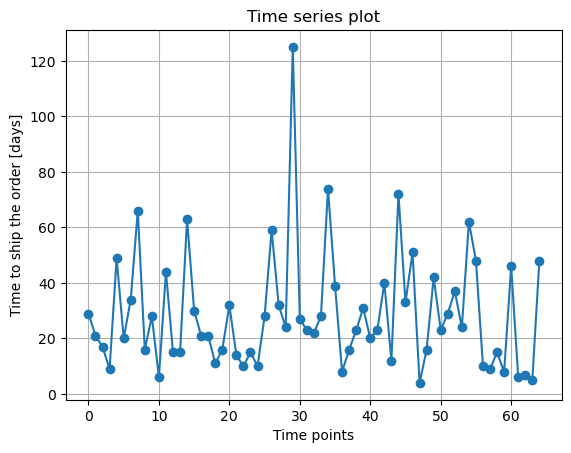

In [7]:
# Time series plot
plt.plot(data, 'o-')
plt.xlabel('Time points')
plt.ylabel('Time to ship the order [days]')
plt.title('Time series plot')
plt.grid()
plt.show()

> Histogram

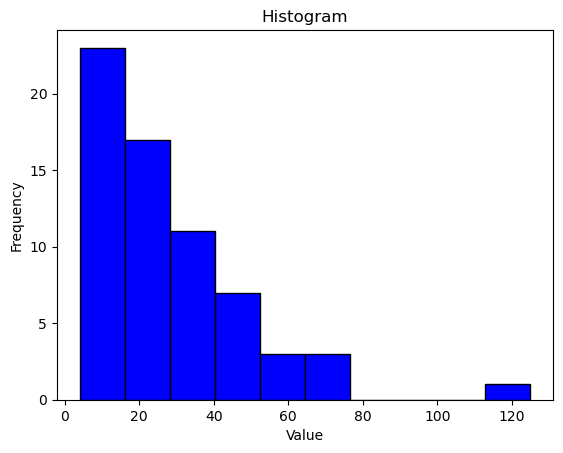

In [8]:
plt.hist(data, bins=10, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the histogram
plt.show()

> 2. Runs test


In [9]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat_runs, pval_runs = runstest_1samp(data['Ex2'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test statistic = 0.325
Runs test p-value = 0.745


> 3. ACF/PACF: autocorrelation


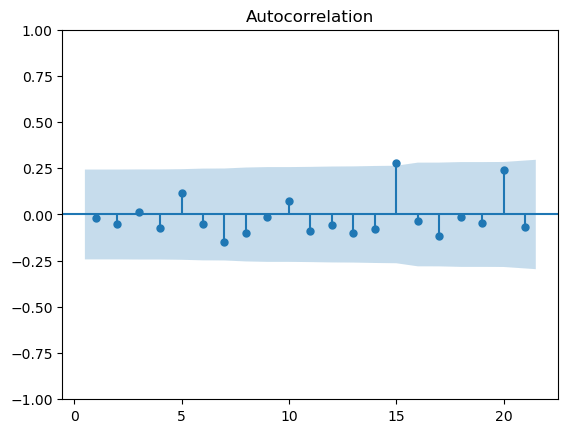

In [10]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Ex2'], lags = int(len(data)/3), zero=False)
plt.show()


For each leg (on x axis) we have a bar and a shaded area (limit of confidence interval based on t test, but it's just a graphical aid). I bar is inside the shaded area then we can say that random origin of data is accepted. 
There is no time dependence in the data.
Runs test doesn't relate on the autocorrelation.

> 4. Histogram and Boxplot

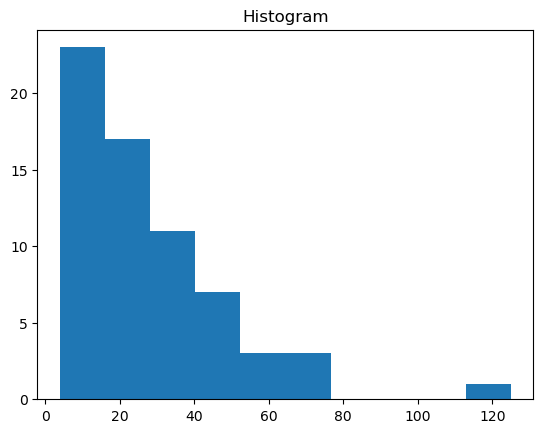

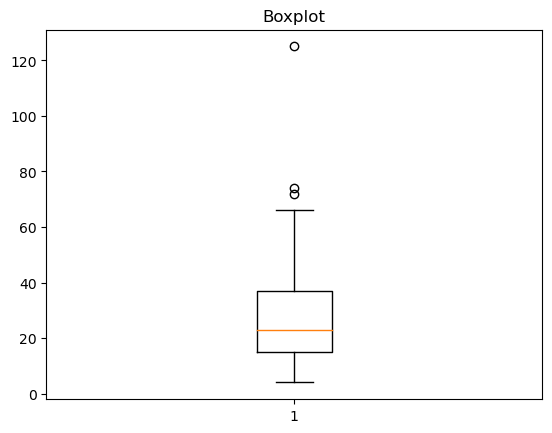

In [11]:
plt.hist(data)
plt.title('Histogram')
plt.show()

plt.boxplot(data)
plt.title('Boxplot')
plt.show()

Very skewed distribution... Probably not normal, but we need a test

> Let's check normality using Shapiro-Wilks

Statistic = 0.844, p-val = 0.000
Reject H0


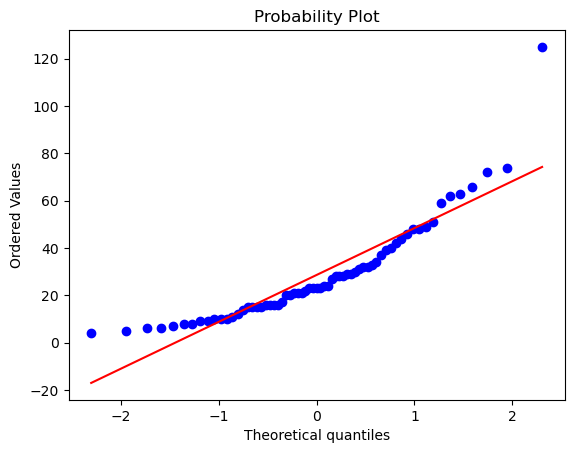

In [12]:
#Normality test
#Shapiro-Wilk test
import matplotlib.pyplot as plt

stat_shapiro, p_shapiro = stats.shapiro(data)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:    
    print('Reject H0')


# Plot the qqplot
stats.probplot(data['Ex2'], dist="norm", plot=plt)
plt.show()



> How much is this result influenced by the outlier? We can try to remove the outlier and check for normality again. 

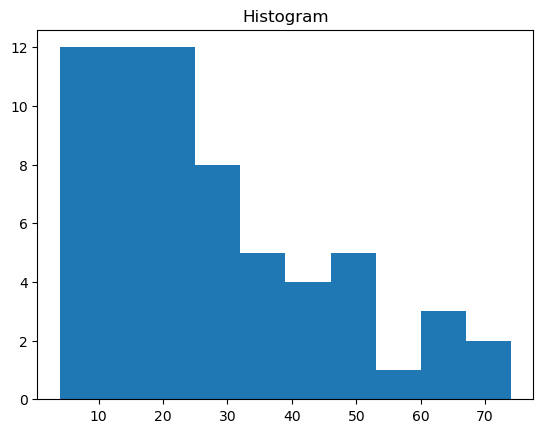

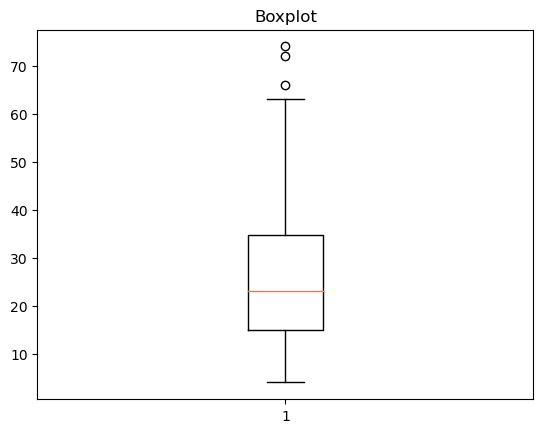

Statistic = 0.914, p-val = 0.000
Reject H0


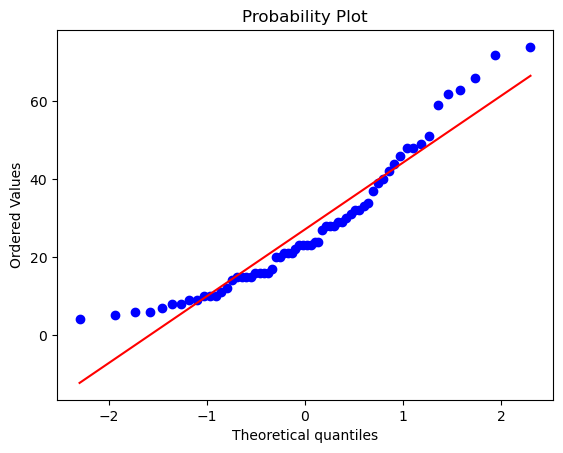

In [13]:
# Remove outlier (point 30) and check normality
data_out = data.drop(index=29)

plt.hist(data_out)
plt.title('Histogram')
plt.show()

plt.boxplot(data_out)
plt.title('Boxplot')
plt.show()

#Normality test
#Shapiro-Wilk test
from scipy.stats import shapiro
stat_shapiro_out, p_shapiro_out = shapiro(data_out)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro_out, p_shapiro_out))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:    
    print('Reject H0')

# Plot the qqplot
stats.probplot(data_out['Ex2'], dist="norm", plot=plt)
plt.show()



> Even after removing the outlier, normality is still violated. 
>
>Try with the Box-Cox transformation. 

So basically, when the distribution is not normal, we need to apply some transformation....Why? Because we need it like this

## Box - Cox Transformation #boxcox

### Remind:

$y = (x^\lambda - 1) / \lambda $, for $\lambda \neq 0$

$y = ln(x)$, for $\lambda = 0$


Lambda = 0.100


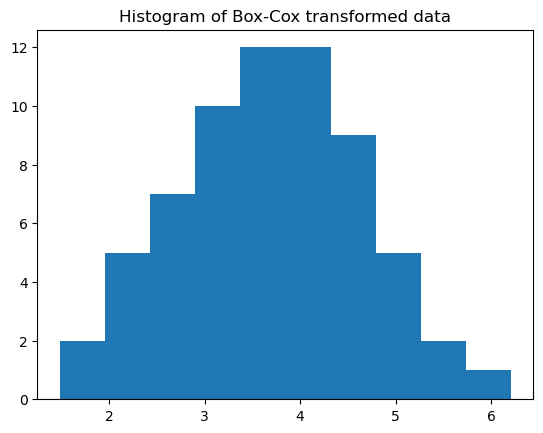

In [14]:
# Box-Cox transformation
[data_norm, lmbda] = stats.boxcox(data['Ex2'])

print('Lambda = %.3f' % lmbda)

plt.hist(data_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()


Shapiro-Wilks on transformed data

Statistics=0.992, p=0.959
Fail to reject H0: the distribution is normal


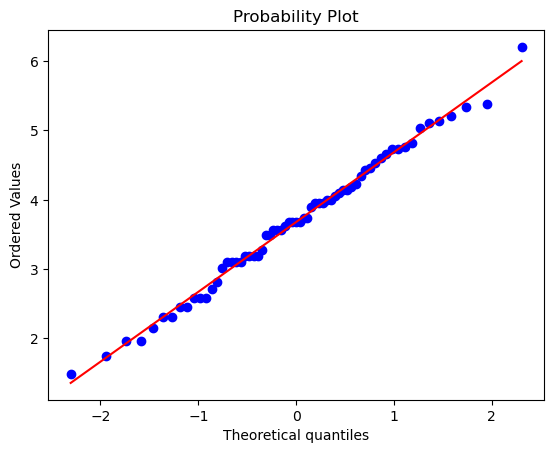

In [15]:
stat, p_shapiro = stats.shapiro(data_norm)
print('Statistics=%.3f, p=%.3f' % (stat, p_shapiro))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0: the distribution is normal')
else:    
    print('Reject H0')

# Plot the qqplot
stats.probplot(data_norm, dist="norm", plot=plt)
plt.show()


## Why did we do all of this?
Normal Random process: the best way to predict the next point of the distribution is the MEAN (most likely outcome of the prediction)

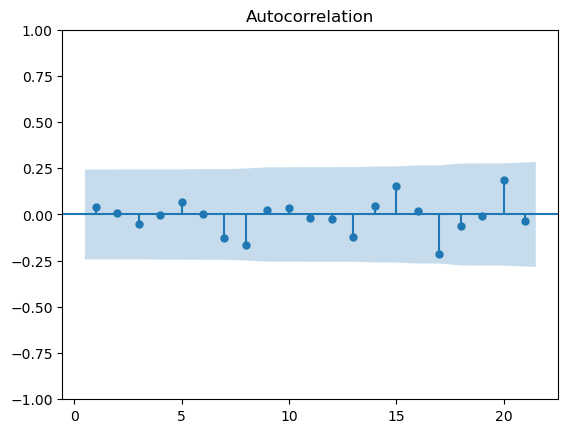

In [10]:
# Plot the acf using the statsmodels library
sgt.plot_acf(data_norm, lags = int(len(data_norm)/3), zero=False)
plt.show()

## Quantitative Tests to verify the lack of auto-correlation
No graphical evidence of auto-correlation from the sample acf plot.
We can verify it with quantitative tests, e.g.:
- Bartlett's test: made as a test on one single lag
- LBQ test: test on multiple lags. It is a more powerful version of the Runs test

> On transformed data
> 
> **Bartlett's test for a specific lag $k$**
>
> $ H_{0} : \rho_{k}=0 $
>
> $ H_{1} : \rho_{k}\neq{0} $
>
> $ \rho_{k} $: true autocorrelation at lag $k$ 
>
> $ r_{k} $: sample autocorrelation at lag $k$ 
>
> Rejection region: $$ |r_{k}| \gt \frac{z_{\alpha/2}}{\sqrt{n}} $$

In [11]:
from statsmodels.tsa.stattools import acf

n = len(data_norm)

#autocorrelation function
[acf_values, lbq, _] = acf(data_norm, nlags = int(np.sqrt(n)), qstat=True, fft = False)


In [12]:

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = 0.040639
Rejection region starts at 0.243104
The null hypothesis is accepted


> **For a global test at different lags, use Ljung-Box (LBQ) test**
> 
> $ H_{0} : \rho_{k}=0, k=1,...,L $
>
> $ H_{1} : \exists k \in [1,L]$ such that $\rho_{k}\neq{0} $
>
> LBQ test statistic: 
> $$ LBQ = n(n+2) \sum_{k=1}^L { \frac{r_{k}^2}{n-k} } $$
>
> Under $ H_{0} $  ($\rho_{k}=0, k=1,...L $), 
> $ LBQ \sim \chi_{L}^2 $, and its rejection region is: $$ LBQ \gt {\chi_{\alpha,L}^2 } $$


In [13]:
lag_test = 6 # this is just an example; 

# Generally speaking: how many lags?
# Rule of thumb: L<sqrt(n)

Q0_LBQ = lbq[lag_test-1]
print('Q0_LBQ = %f' % Q0_LBQ)

#Rejection region for chi square distribution 
dof = lag_test
chi2_alfa= stats.chi2.ppf(1-alpha,dof)
print('Rejection region starts at %f' % chi2_alfa)

if Q0_LBQ>chi2_alfa:        
  print('The null hypothesis is rejected')                
else: 
  print('The null hypothesis is accepted')

# Compute the p-value for the LBQ test
pval = 1 - stats.chi2.cdf(Q0_LBQ, lag_test)
print('p-value = %f' % pval)


Q0_LBQ = 0.621926
Rejection region starts at 12.591587
The null hypothesis is accepted
p-value = 0.996024


> Alternatively, you can use the `acorr_ljungbox` function. 

In [14]:
#LBQ test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

lbq_test = acorr_ljungbox(data_norm, lags=[lag_test], return_df=True)
print('LBQ test statistic at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_stat']))
print('LBQ test p-value at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_pvalue']))

LBQ test statistic at lag 6 = 0.621926
LBQ test p-value at lag 6 = 0.996024


### Design a 95% **prediction interval** for future observations:

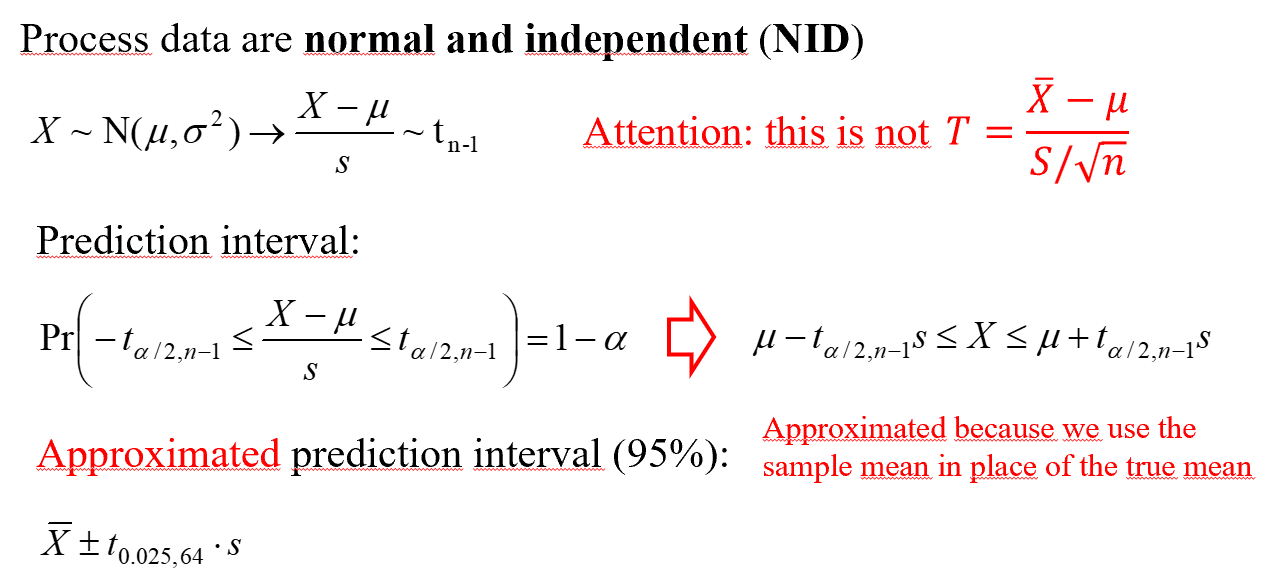

In [17]:
alpha = 0.05
df = len(data_norm) - 1
Xbar = data_norm.mean()
s = data_norm.std()
t_alpha = stats.t.ppf(1 - alpha/2, df)


[pred_lo, pred_up] = [Xbar-t_alpha*s,Xbar+t_alpha*s]
print('Two-sided prediction interval for transformed data: [%.3f %.3f]' % (pred_lo, pred_up))

Two-sided prediction interval for transformed data: [1.719 5.640]


**Attention**: this is the prediction interval on the transformed data.
To estimate the prediction interval on the **original data** we need to back transform.

Remind:
$y = (x^\lambda - 1) / \lambda $, for $\lambda \neq 0$

Thus:
$x = (y\lambda + 1)^{(1/\lambda)}$ 

In [18]:

[pred_lo_ORIG, pred_up_ORIG] = [(pred_lo*lmbda+1)**(1/lmbda),(pred_up*lmbda+1)**(1/lmbda)]
print('Two-sided prediction interval for original data: [%.3f %.3f]' % (pred_lo_ORIG, pred_up_ORIG))

Two-sided prediction interval for original data: [4.887 87.689]


# Violation of Indepence Assumptions (non-random pattern)

- Gapping
- Bathcing


A company that produces tomato sauce is testing a new accurate system to control the level of sauce in each bottle. To this aim, they are monitoring the level in each bottle by using an automated optical system that measures the deviation (in mm) of the sauce level from a target level.

The data for 300 consecutive measurements are reported in the provided file `ESE3_ex3.csv`.
Since the measured data are auto-correlated, check if:
- Data batching is suitable to get rid of the data auto-correlation
- Data gapping is suitable to get rid of the data auto-correlation
- Comment the results

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

# Import the dataset
data = pd.read_csv('ESE3_ex3.csv')

data.head()

,Ex3
0,1.000000
1,0.800000
2,1.100000
3,1.036429
4,0.396703


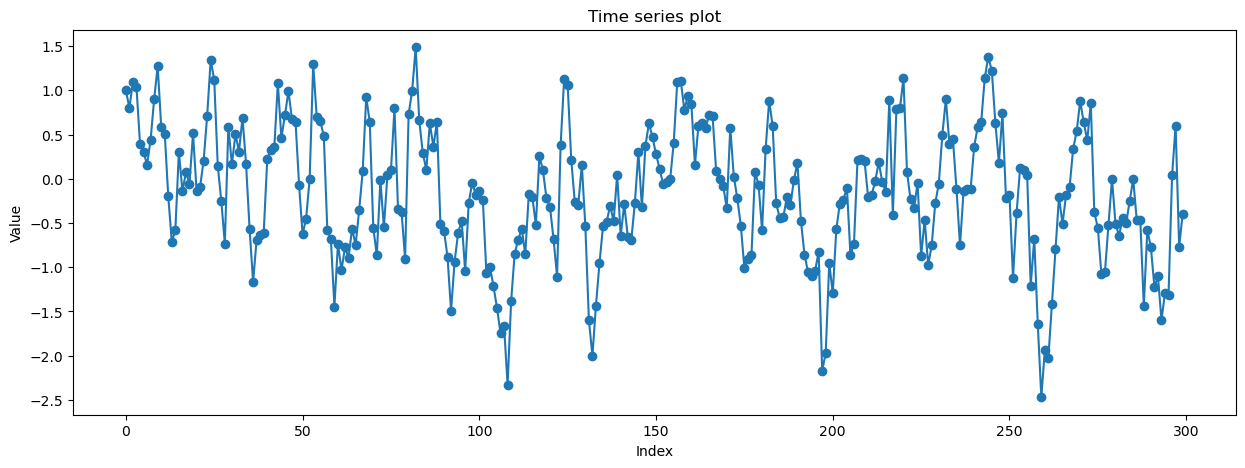

In [ ]:
#Time series plot
plt.figure(figsize=(15, 5))
plt.plot(data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [ ]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat_runs, pval_runs = runstest_1samp(data['Ex3'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alfa=0.05
if pval_runs < alfa:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')
    

Runs test statistic = -9.831
Runs test p-value = 0.000
Reject H0: the data are not random


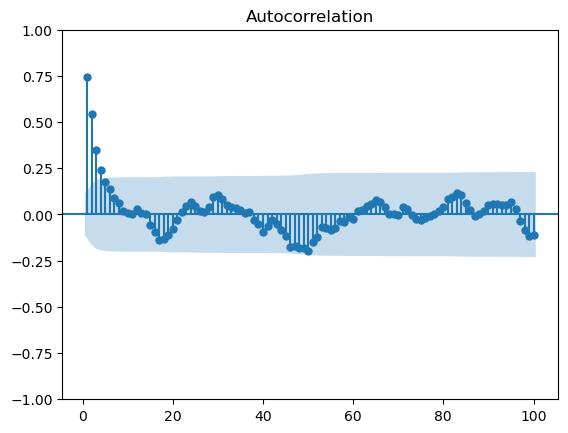

In [ ]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Ex3'], lags = int(len(data)/3), zero=False)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf

n = len(data)

#autocorrelation function
[acf_values, lbq, _] = acf(data, nlags = int(np.sqrt(n)), qstat=True, fft = False)

#Bartlett's test at lag 1
alpha = 0.05
lag_test = 1
rk = acf_values[lag_test]
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(n)))

if rk>z_alpha2/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = 0.741226
Rejection region starts at 0.113159
The null hypothesis is rejected


In [ ]:
#LBQ test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

lag_test = 4
lbq_test = acorr_ljungbox(data, lags=[lag_test], return_df=True)
print('LBQ test statistic at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_stat']))
print('LBQ test p-value at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_pvalue']))

LBQ test statistic at lag 4 = 310.851611
LBQ test p-value at lag 4 = 0.000000


The data are auto-correlated, check if:
1. Data gapping is suitable to get rid of the data autocorrelation. 
2. Data batching is suitable to get rid of the data autocorrelation. 

## Gapping

In [ ]:
#Gapping 
gap_size= 6 # this is just an example, you can try different gapping intervals
gap_num= int(len(data)/gap_size)

gap_data= np.zeros((gap_num))
for i in range (gap_num):
    gap_data[i]=data['Ex3'][i*6]

> Alternatively, use the built-in array manipulation functionalities:

In [ ]:
# Take one data point every 6
gap_data = data['Ex3'][::gap_size]

> Let's analyze data after gapping

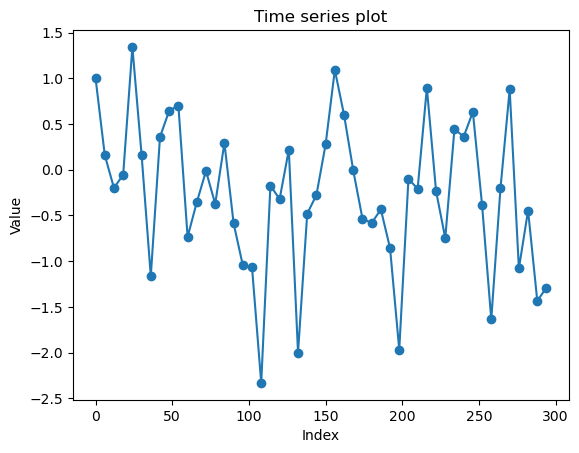

In [ ]:
#Time series plot and runs test
plt.plot(gap_data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [ ]:
# Runs test
stat_runs, pval_runs = runstest_1samp(gap_data, correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))
alpha=0.05
if pval_runs < alpha:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')
    

Runs test statistic = -1.706
Runs test p-value = 0.088
Accept H0: the data are random


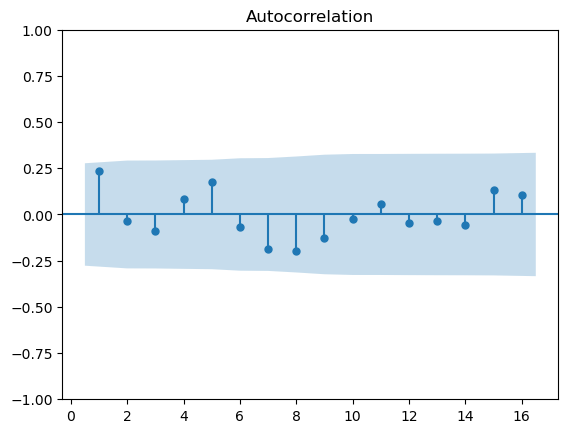

In [ ]:
# Plot the acf using the statsmodels library

sgt.plot_acf(gap_data, lags = int(len(gap_data)/3), zero=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

#autocorrelation function
[acf_value, lbq, _] = acf(gap_data, nlags = int(len(gap_data)/3) , qstat=True)

#Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(gap_data))))

if rk>z_alpha2/np.sqrt(len(gap_data)):
    print('The null hypothesis is rejected')
else: 
    print('The null hypothesis is accepted')


Test statistic rk = 0.232564
Rejection region starts at 0.277181
The null hypothesis is accepted


## Batching

> Let's try with batching. Create 50 subgroups of size 6. 

In [ ]:
# Batching
batch_size = 6
batch_num = int(len(data)/batch_size)

j=0
batch_data = np.zeros((batch_num))
for i in range (batch_num):
    batch_data[i]=np.sum(data['Ex3'][j:j+batch_size])/batch_size
    j=j+batch_size

In [ ]:
# Alternative method
# Create a new column in the dataframe with the corresponding batch number
data['Batch'] = np.repeat(np.arange(1, batch_num+1), batch_size)

# Store the batch means in a new dataframe
batch_data = data.groupby('Batch').mean()

Let's analyze data after batching

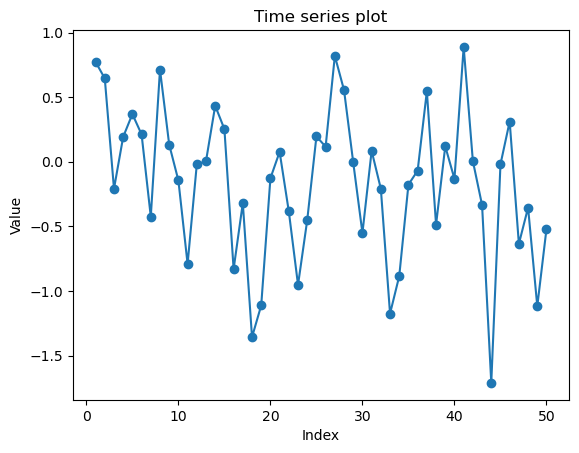

In [ ]:
#Time series plot
plt.plot(batch_data, 'o-')
plt.title('Time series plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


> Check if the data are random.

In [ ]:
# Runs test 
stat_runs, pval_runs = runstest_1samp(batch_data, correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
alpha=0.05
if pval_runs < alpha:
    print('Reject H0: the data are not random')
else:
    print('Accept H0: the data are random')
    

Runs test p-value = 0.102
Accept H0: the data are random


> Now check for autocorrelation.

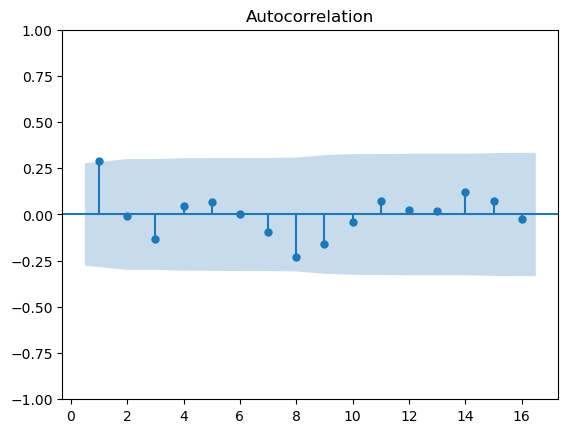

In [ ]:
# Plot the acf using the statsmodels library

sgt.plot_acf(batch_data, lags = int(len(batch_data)/3), zero=False)

plt.show()

We are uncertain about the results: Runs tell us the test is independent, but from the graph we see something so and so. In this case the best thing to do is to make a test on autocorellation (Bartlett).

In [ ]:
from statsmodels.tsa.stattools import acf
#autocorrelation function
[acf_value, lbq, _] = acf(batch_data, nlags = int(len(batch_data)/3), qstat=True)

#Bartlett's test at lag 1
lag_test=1
rk=abs(acf_value[lag_test])
alpha = 0.05 # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (z_alpha2/np.sqrt(len(batch_data))))

if rk>z_alpha2/np.sqrt(len(batch_data)):
    print('The null hypothesis is rejected')
else: 
    print('The null hypothesis is accepted')


Test statistic rk = 0.291415
Rejection region starts at 0.277181
The null hypothesis is rejected
